# Exploring Structural Generalization w/ Circuit Stability

In [14]:
import re
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

import numpy as np
import pandas as pd

In [15]:
sns.set_theme()
sns.set_style("whitegrid")
plt.style.use("alan.mplstyle")
ROOT = Path("../src/experiments/data/precedence")

In [16]:
import json
import networkx as nx
from matplotlib.colors import ListedColormap

def rank_corr(df, method="spearman"):
    """Expects a dataframe with circuit indices as columns and
    the circuit components in the rows.
    """
    return df.corr(method=method)
    
def connected_comps(rc, thresh, index2label):
    """Expects a rank correlation matrix, a threshold to determine
    at what level are two circuits considered to be equal. Also takes
    in a dictionary that maps the labels of the columns into their actual
    labels.
    """
    adj = rc >= thresh
    G = nx.from_numpy_array(adj)
    components = list(nx.connected_components(G))
    components = [list(v) for v in components]
    return components, [[index2label[v] for v in comp] for comp in components]

def process_graph_file(fname):
    f = json.load(open(fname, "r"))
    return {k: v["score"] for k,v in f["edges"].items()}

def cc_graph(ccs):
    """Visualizes the connected components as a graph.
    """
    G = nx.Graph()
    shape_l = 'os^v<>*pHD'
    for comp_id, component in enumerate(ccs):
        for node in component:
            G.add_node(tuple(node), color=comp_id, node_shape=shape_l[comp_id % len(shape_l)])
    for component in ccs:
        for r, c in component:
            neighbors = [(r+1, c), (r-1, c), (r, c+1), (r, c-1),(r-1,c+1), (r-1,c-1), (r+1,c-1), (r+1,c+1)]  # 4-neighbor adjacency
            for neighbor in neighbors:
                if neighbor in component:
                    G.add_edge((r, c), neighbor)
    spanning_trees = []
    
    for component in ccs:
        # Create a subgraph for the component
        subgraph = G.subgraph(component)
        # Compute the minimum spanning tree (MST) for this subgraph
        mst = nx.minimum_spanning_tree(subgraph)
        spanning_trees.append(mst)
    # Combine the spanning trees into a new graph
    G_mst = nx.Graph()
    for mst in spanning_trees:
        G_mst.add_nodes_from(mst.nodes())
        G_mst.add_edges_from(mst.edges())
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    nshapes = {k: shape_l[G.nodes[k]["color"] % len(shape_l)] for k in G.nodes}
    pos = {node: (node[1], -node[0]) for node in G_mst.nodes}
    colors = {n: G.nodes[n]["color"] for n in G_mst.nodes}
    nlabels = {k: f"{k[0]},{k[1]}" for k in G.nodes}
    cmap = ListedColormap(sns.color_palette("hls", len(ccs)))
    for node, shape in nshapes.items():
        nx.draw_networkx_nodes(G_mst, pos, nodelist=[node], node_size=600, node_shape=shape, node_color=cmap(colors[node]))
    
    # Draw the edges
    nx.draw_networkx_edges(G_mst, pos, width=5)
    nx.draw_networkx_labels(G_mst, pos, labels=nlabels, font_size=7, font_weight="bold")

In [4]:
types = ["all", "and-not", "only-not"]
types_np = ["all-np", "and-not-np", "

In [5]:
df = pd.DataFrame(circuits)

In [6]:
rank_corr_spear = rank_corr(df.T).values

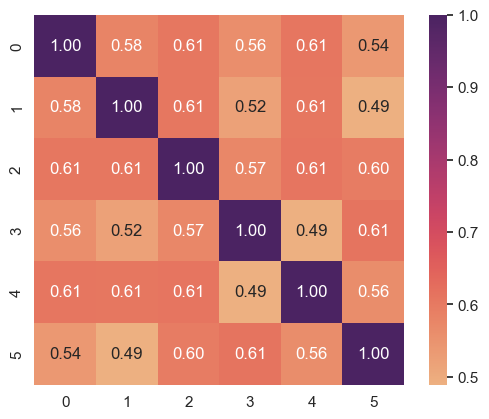

In [7]:
sns.heatmap(rank_corr_spear, cmap="flare", square=True, cbar=True, annot=True, fmt=".2f")
plt.show()

In [12]:
a = df.T.corr(method="pearson")

<Axes: >

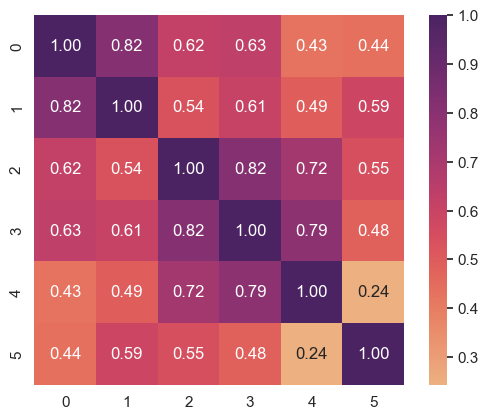

In [13]:
sns.heatmap(a, cmap="flare", square=True, cbar=True, annot=True, fmt=".2f")

In [ ]:
k